## 维度很重要
Numpy 为什么在 Python 的科学计算上优势明显？其中最主要的一个原因是 Numpy 可以处理多维数据， 而且 Numpy 底层的 C 让它在多维数据上计算也非常快。

特别是在做机器学习，人工智能的时候，十有八九，人工智能的算法里面，就会出现多维数据的计算问题。可见多维数据在科学计算中的普遍性， 也可见 Numpy 真的是非常有价值的一个 Python 库。

### 创建多维数据
想象我们要维护一个车辆数据信息，每一个数据，代表的是一辆车的百公里加速时间，首先就是要创建一个车辆百公里加速的列表。

In [1]:
import numpy as np

cars = np.array([5, 10, 12, 6])
print("数据：", cars, "\n维度：", cars.ndim)

数据： [ 5 10 12  6] 
维度： 1


你会发现，cars.ndim 会返回给你一个维度的属性，现在这组数据是一个一维数据。你可以认为这是某一次测试 4 款车收集到的数据。
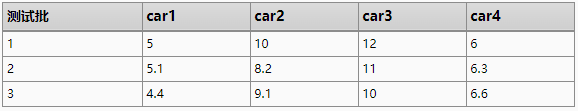

你看看，我们为了让结果更加准确，想着要多测几组数据，这就变成了一个二维数据了。在代码中，你可以这样一次性创建二维数据。

In [2]:
cars = np.array([
[5, 10, 12, 6],
[5.1, 8.2, 11, 6.3],
[4.4, 9.1, 10, 6.6]
])

print("数据：\n", cars, "\n维度：", cars.ndim)

数据：
 [[ 5.  10.  12.   6. ]
 [ 5.1  8.2 11.   6.3]
 [ 4.4  9.1 10.   6.6]] 
维度： 2


既然能创建二维数据，当然更高维度也不在话下啦，比如三维，可以表示，我在不同场地，多次测试不同测量，比二维数据多出来的一个维度就是不同场地这个维度了。 比如下面这样：

In [3]:
cars = np.array([
[
    [5, 10, 12, 6],
    [5.1, 8.2, 11, 6.3],
    [4.4, 9.1, 10, 6.6]
],
[
    [6, 11, 13, 7],
    [6.1, 9.2, 12, 7.3],
    [5.4, 10.1, 11, 7.6]
],
])

print("总维度：", cars.ndim)
print("场地 1 数据：\n", cars[0], "\n场地 1 维度：", cars[0].ndim)
print("场地 2 数据：\n", cars[1], "\n场地 2 维度：", cars[1].ndim)

总维度： 3
场地 1 数据：
 [[ 5.  10.  12.   6. ]
 [ 5.1  8.2 11.   6.3]
 [ 4.4  9.1 10.   6.6]] 
场地 1 维度： 2
场地 2 数据：
 [[ 6.  11.  13.   7. ]
 [ 6.1  9.2 12.   7.3]
 [ 5.4 10.1 11.   7.6]] 
场地 2 维度： 2


四位或更多维我就不打出来了，太麻烦了。你懂这个意思就行。

### 添加数据
上面创建了一个多维数据，但是我还会有很多新增数据的需求，比如在原数据的基础上，要新增一条，我总不能每次新增的时候，都创建一整个大数据吧，这样多麻烦。 还好，Numpy 有很多添加数据的方法。
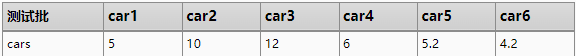

In [4]:
cars1 = np.array([5, 10, 12, 6])
cars2 = np.array([5.2, 4.2])
cars = np.concatenate([cars1, cars2])
print(cars)

[ 5.  10.  12.   6.   5.2  4.2]


这种一维的数据很简单，也很好理解，就和 Python 中的 List 添加很像。但是如果数据换成了二维呢？我要添加一组测试数据呢？
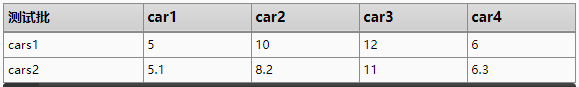

In [5]:
test1 = np.array([5, 10, 12, 6])
test2 = np.array([5.1, 8.2, 11, 6.3])

# 首先需要把它们都变成二维，下面这两种方法都可以加维度
test1 = np.expand_dims(test1, 0)
test2 = test2[np.newaxis, :]

print("test1加维度后 ", test1)
print("test2加维度后 ", test2)

# 然后再在第一个维度上叠加
all_tests = np.concatenate([test1, test2])
print("括展后\n", all_tests)


test1加维度后  [[ 5 10 12  6]]
test2加维度后  [[ 5.1  8.2 11.   6.3]]
括展后
 [[ 5.  10.  12.   6. ]
 [ 5.1  8.2 11.   6.3]]


### 合并数据
有同学肯定会问了，你既然能在第一个维度上叠加，那你能不能在第二个维度上叠加呢？当然可以，只需要巧妙给 np.concatenate 一个参数就好。

In [6]:
print("第一维度叠加：\n", np.concatenate([all_tests, all_tests], axis=0))
print("第二维度叠加：\n", np.concatenate([all_tests, all_tests], axis=1))

第一维度叠加：
 [[ 5.  10.  12.   6. ]
 [ 5.1  8.2 11.   6.3]
 [ 5.  10.  12.   6. ]
 [ 5.1  8.2 11.   6.3]]
第二维度叠加：
 [[ 5.  10.  12.   6.   5.  10.  12.   6. ]
 [ 5.1  8.2 11.   6.3  5.1  8.2 11.   6.3]]


这里其实是一个 Numpy Array 合并的概念。只要维度能够对齐，你可以在任意维度上进行合并操作。注意，有些数据维度是对不齐的，这样没办法合并。比如：
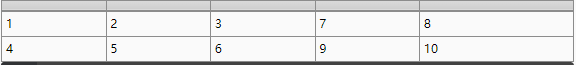

In [7]:
a = np.array([
[1,2,3],
[4,5,6]
])
b = np.array([
[7,8],
[9,10]
])

print(np.concatenate([a,b], axis=1))  # 这个没问题
# print(np.concatenate([a,b], axis=0))  # 这个会报错

[[ 1  2  3  7  8]
 [ 4  5  6  9 10]]


除了 np.concatenate()，还有两个比较好用的在二维数据上可以方便调用的功能，分别是 np.vstack(), np.hstack().

可以将数据横向合并：
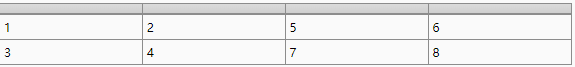

也可以将数据竖向合并：
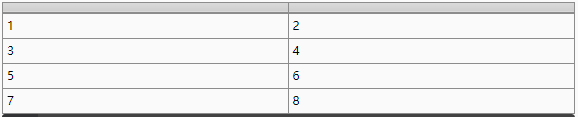

In [8]:
a = np.array([
[1,2],
[3,4]
])
b = np.array([
[5,6],
[7,8]
])
print("竖直合并\n", np.vstack([a, b]))
print("水平合并\n", np.hstack([a, b]))

竖直合并
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
水平合并
 [[1 2 5 6]
 [3 4 7 8]]


### 观察形态
除了 np.ndim 来查看数据的形态，其实我们有时候还想更加了解数据的细节问题，比如这个数据的大小，规格。方便我们管理这些数据。

比如当我想知道到底有多少车辆测试数据时，你可能会通过遍历的方法来计数。

In [9]:
cars = np.array([
[5, 10, 12, 6],
[5.1, 8.2, 11, 6.3],
[4.4, 9.1, 10, 6.6]
])

count = 0
for i in range(len(cars)):
    for j in range(len(cars[i])):
        count += 1
print("总共多少测试数据：", count)    

总共多少测试数据： 12


你看上面写的多麻烦。其实 Numpy 还有更好用的方式获取总个数。看看使用 cars.size

In [10]:
print("总共多少测试数据：", cars.size)

总共多少测试数据： 12


更进一步，我不光想知道总数据，我还想知道当前有多少次测试（第一个维度，行），和在多少辆车上测试了（第二个维度，列）。怎么办？

In [11]:
print("第一个维度：", cars.shape[0])
print("第二个维度：", cars.shape[1])
print("所有维度：", cars.shape)

第一个维度： 3
第二个维度： 4
所有维度： (3, 4)


### 总结
数据是多样的，有时候会跨越很多个维度。所以理解维度，理解形态对于科学计算中，数据的理解，都是十分重要的。